___STOCK MARKET CLUSTERING___


_In this project we will extracting live stock market data from yahoo finance.
We will find similarities amongs various companies using their stock market prices 
and then cluster them into different cluster using th K-Means algorithm._


In [12]:

from pandas_datareader import data  #https://bit.ly/2SEL5O7
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import warnings

In [18]:
companies_dict={
    'Amazon' : 'AMZN',
    'Apple' : 'AAPL',
    'Walgreen' : 'WBA',
    'Northrop Grumman' : 'NOC',
    'Boeing' : 'BA',
    'Lock Head Martin' : 'LMT',
    'McDonalds' : 'MCD',
    'Intel' : 'INTC',
    'Navistar' : 'NAV',
    'IBM' : 'IBM',
    'Texas Instruments' : 'TXN',
    'MasterCard' : 'MA',
    'Microsoft' : 'MSFT',
    'General Electrics' : 'GE',
    'American Express' : 'AXP',
    'Pepsi' : 'PEP',
    'Coca Cola' : 'KO',
    'Jhonson & Jhonson' : 'JNJ',
    'Toyota' : 'TM',
    'Honda' : 'HMC',
    'Mistubishi' : 'MSBHF',
    'Sony' : 'SNE',
    'Exxon' : 'XOM',
    'Chevron' : 'CVX',
    'Valero Energy' : 'VLO',
    'Ford' : 'F',
    'Bank of America' : 'BAC'}

In [19]:
data_source = 'yahoo'
start_date = '2016-01-25'
end_date ='2021-01-25'
df =data.DataReader (list(companies_dict.values()),data_source,start_date,end_date)

In [20]:
df.head()

Attributes   Adj Close                                                \
Symbols           AMZN       AAPL        WBA         NOC          BA   
Date                                                                   
2016-01-25  596.530029  22.997717  68.051102  168.050629  111.216316   
2016-01-26  601.250000  23.124914  68.682251  168.669846  114.803650   
2016-01-27  583.349976  21.605453  67.826302  164.686462  104.552841   
2016-01-28  635.349976  21.760410  67.100060  166.497925  105.835335   
2016-01-29  587.000000  22.512041  68.924316  171.035873  107.736595   

Attributes                                                      ...  \
Symbols            LMT         MCD       INTC   NAV        IBM  ...   
Date                                                            ...   
2016-01-25  185.337753  104.742210  25.720699  6.54  96.906776  ...   
2016-01-26  184.389130  105.823021  26.016144  7.02  97.311638  ...   
2016-01-27  182.570999  106.209656  25.903173  6.86  96.017723  ...   
2016-01-28  181.516998  107.536499  26.042213  6.75  97.017929  ...   
2016-01-29  185.328979  108.766701  26.954597  7.27  99.057983  ...   

Attributes      Volume                                                      \
Symbols            JNJ        TM        HMC   MSBHF        SNE         XOM   
Date                                                                         
2016-01-25   9350200.0  248600.0   778000.0     0.0  1177500.0  17086600.0   
2016-01-26  17266600.0  267500.0  1205800.0  2400.0  1078300.0  18724700.0   
2016-01-27  19330500.0  320900.0  1175700.0     0.0   739900.0  18106100.0   
2016-01-28  12789500.0  313700.0  1292200.0     0.0  2452800.0  16157700.0   
2016-01-29  15614600.0  746000.0  1491500.0   200.0  5517000.0  25161900.0   

Attributes                                                   
Symbols            CVX         VLO           F          BAC  
Date                                                         
2016-01-25  12370300.0   6063300.0  96738600.0  186419100.0  
2016-01-26  12191400.0   5989200.0  45969800.0  124246900.0  
2016-01-27  12380600.0   7529000.0  42064200.0  124095800.0  
2016-01-28  13017400.0  10704300.0  75699800.0  110996200.0  
2016-01-29  20248900.0   7275200.0  52137400.0  159984100.0  

[5 rows x 162 columns]

In [21]:
df.isna().sum()

Attributes  Symbols
Adj Close   AMZN       0
            AAPL       0
            WBA        0
            NOC        0
            BA         0
                      ..
Volume      XOM        0
            CVX        0
            VLO        0
            F          0
            BAC        0
Length: 162, dtype: int64

In [22]:
stock_open = np.array(df['Open']).T
stock_close =np.array(df['Close']).T

In [23]:
movements = stock_close-stock_open #movements is the diffrence between closing and opening values 
                                   #and positive of that value means you can you use this to buy stock in future


In [24]:
sum_of_movement = np.sum(movements,1)

In [25]:
for i in range(len(companies_dict)):
    print('company:{},chnage:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:AMZN,chnage:-559.2619323730469
company:AAPL,chnage:61.307416915893555
company:WBA,chnage:-25.350032806396484
company:NOC,chnage:-63.20024108886719
company:BA,chnage:-122.87032318115234
company:LMT,chnage:-103.88948059082031
company:MCD,chnage:17.690208435058594
company:INTC,chnage:31.15997314453125
company:NAV,chnage:-22.979968070983887
company:IBM,chnage:-10.419708251953125
company:TXN,chnage:65.19000244140625
company:MA,chnage:-5.429595947265625
company:MSFT,chnage:40.19993591308594
company:GE,chnage:-16.451530933380127
company:AXP,chnage:-6.709743499755859
company:PEP,chnage:36.390098571777344
company:KO,chnage:-5.150016784667969
company:JNJ,chnage:20.03998565673828
company:TM,chnage:-44.53997802734375
company:HMC,chnage:-14.500017166137695
company:MSBHF,chnage:-21.049994468688965
company:SNE,chnage:-4.770055770874023
company:XOM,chnage:-32.890071868896484
company:CVX,chnage:-32.429908752441406
company:VLO,chnage:-55.15993118286133
company:F,chnage:-8.890007019042969
company

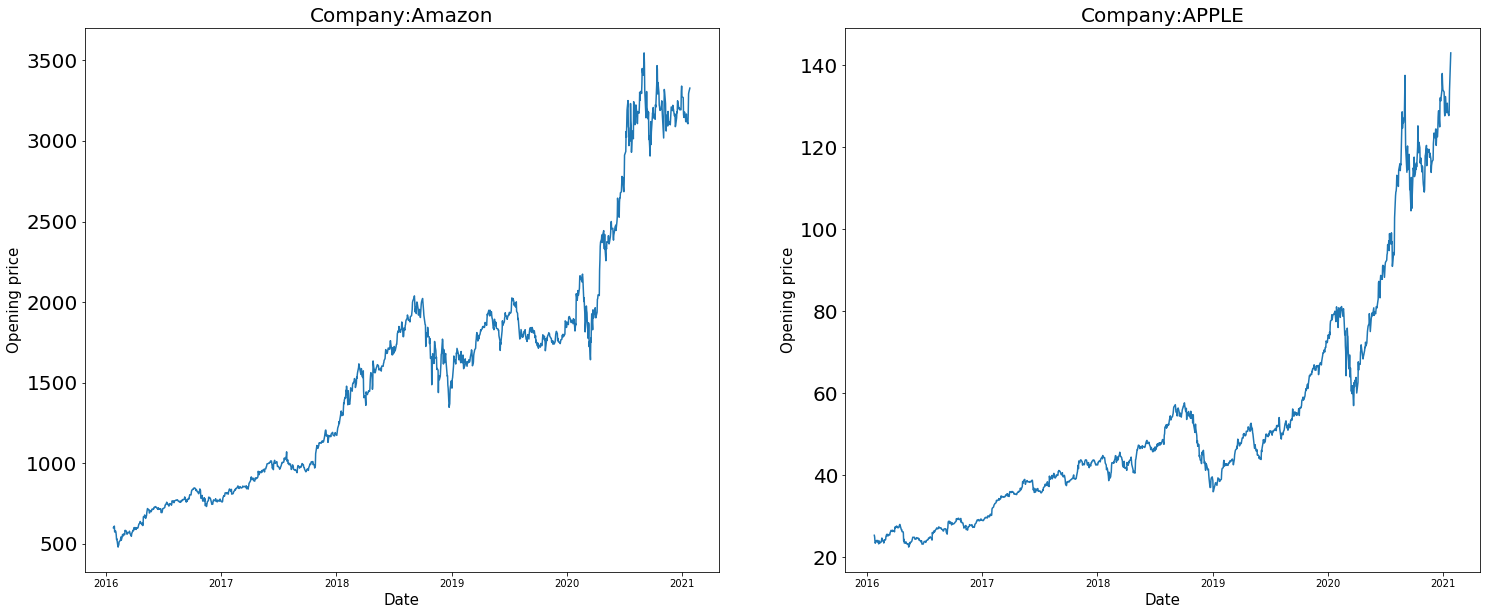

In [28]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)

plt.title('Company:Amazon',fontsize=20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Opening price',fontsize=15)
plt.plot(df['Open']['AMZN'])

plt.subplot(1,2,2)

plt.title('Company:APPLE',fontsize=20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Opening price',fontsize=15)
plt.plot(df['Open']['AAPL'])


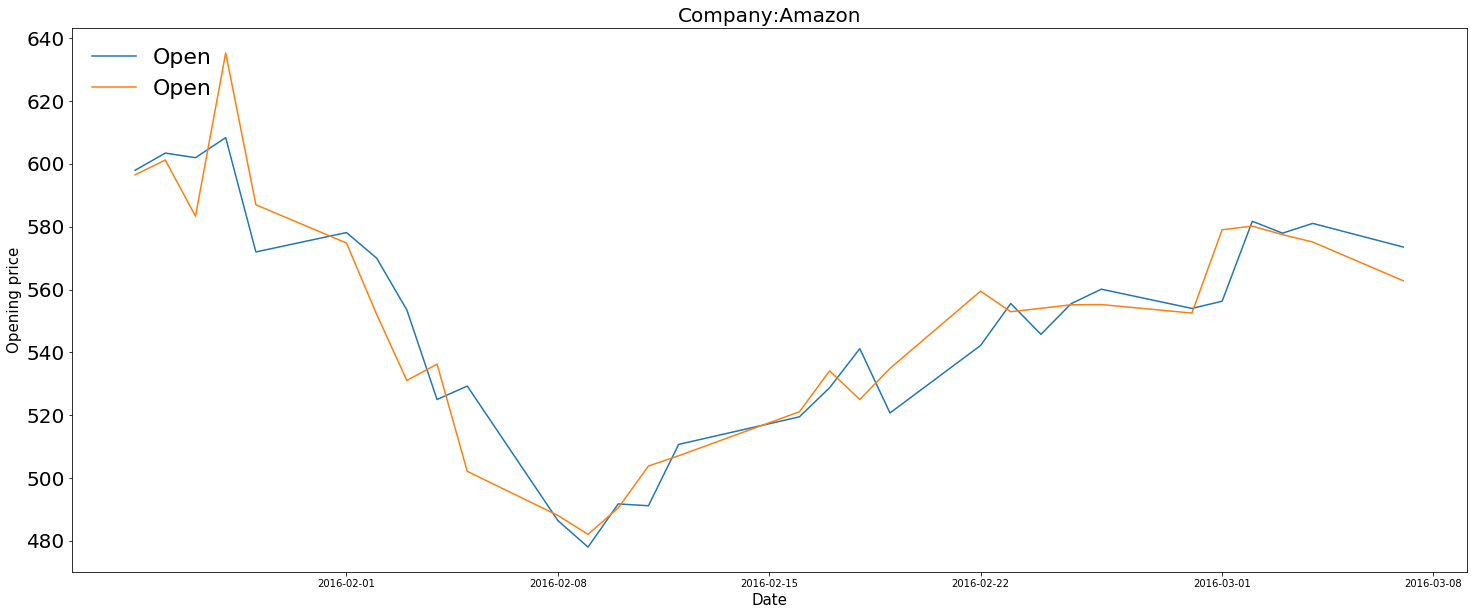

In [29]:
plt.figure(figsize=(25,10))

plt.title('Company:Amazon',fontsize=20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Opening price',fontsize=15)
plt.plot(df.iloc[0:30]['Open']['AMZN'],label='Open')
plt.plot(df.iloc[0:30]['Close']['AMZN'],label='Open')
plt.legend(loc='upper left',frameon=False,framealpha=1,prop={'size':22})



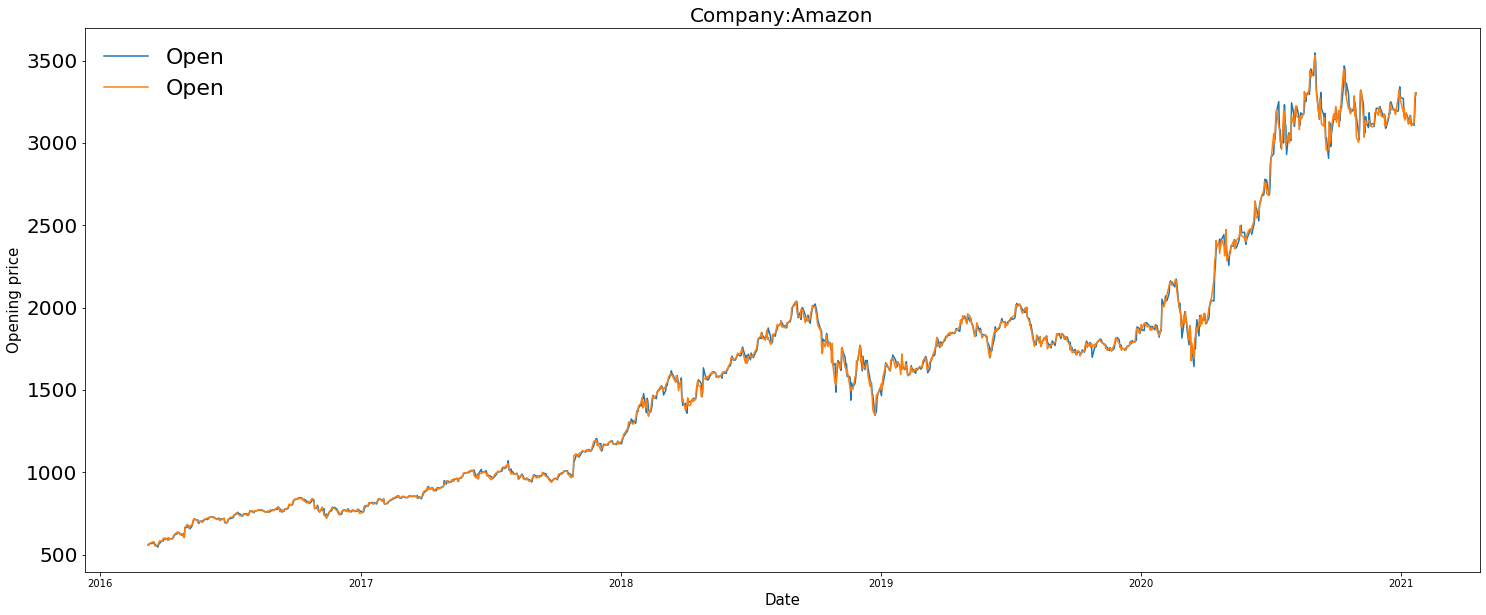

In [30]:
plt.figure(figsize=(25,10))

plt.title('Company:Amazon',fontsize=20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Opening price',fontsize=15)
plt.plot(df.iloc[30:-1]['Open']['AMZN'],label='Open')
plt.plot(df.iloc[30:-1]['Close']['AMZN'],label='Open')
plt.legend(loc='upper left',frameon=False,framealpha=1,prop={'size':22})

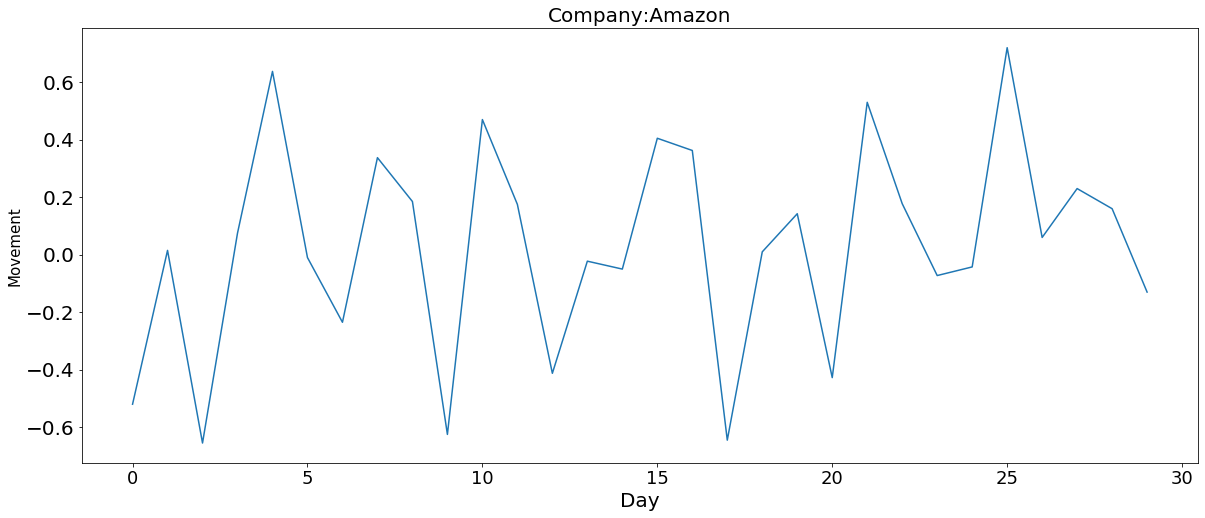

In [32]:
plt.figure(figsize=(20,8))

plt.title('Company:Amazon',fontsize=20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Day',fontsize=20)
plt.ylabel('Movement',fontsize=15)
plt.plot(movements[1][0:30])

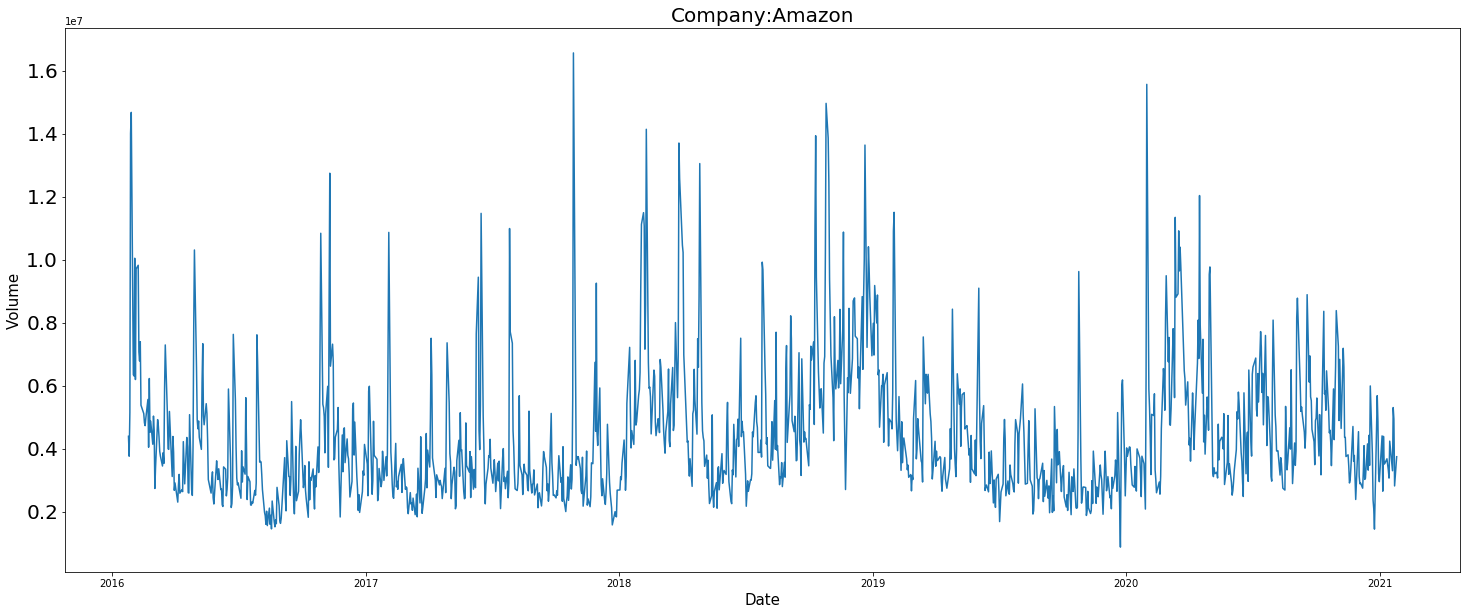

In [34]:
plt.figure(figsize=(25,10))

plt.title('Company:Amazon',fontsize=20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Volume',fontsize=15)
plt.plot(df['Volume']['AMZN'],label='Open')


___NORMALIZATION___

_Stock price of amazon and apple has different scales ,as it is significant we will normalize our data in order to have consistency in our data._

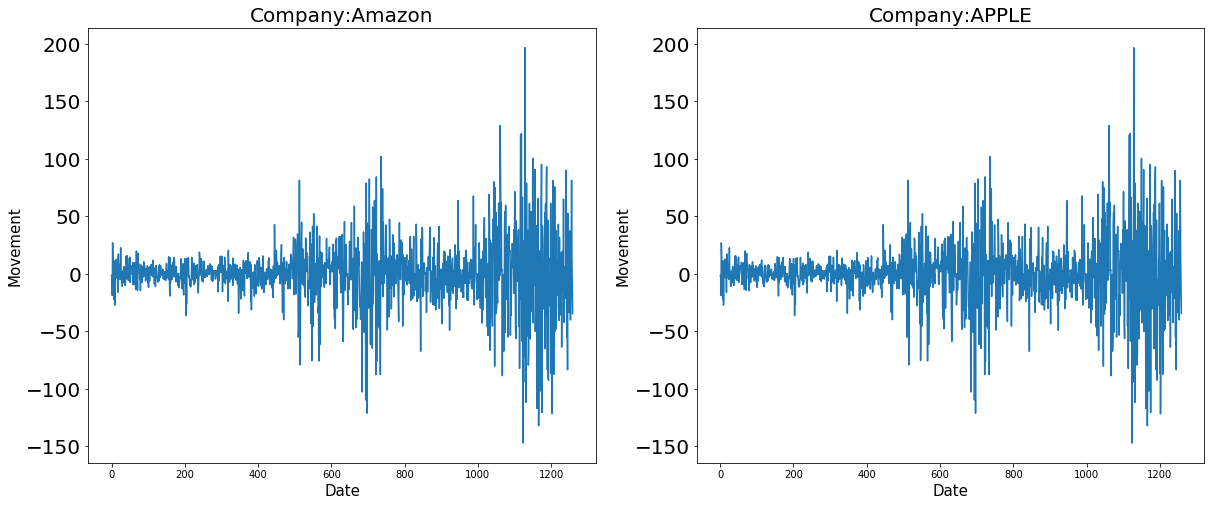

In [37]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

plt.title('Company:Amazon',fontsize=20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Movement',fontsize=15)
plt.plot(movements[0])

plt.subplot(1,2,2)

plt.title('Company:APPLE',fontsize=20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Movement',fontsize=15)
plt.plot(movements[0])

In [40]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer () 
norm_movements = normalizer.fit_transform(movements)

In [41]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.3812815525985905
0.24200205212698694
-0.0003806114089883448


___CREATE A PIPELINE___

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

#initialize a normalizer
normalizer=Normalizer()

#create KMeans models
kmeans=KMeans(n_clusters =5,max_iter =1000,random_state=1)

#make apipeline combining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

#fit pipeline to daily stock movements
pipeline.fit(movements)

#prediction
predictions=pipeline.predict(movements)

In [44]:
predictions

array([1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 2, 2, 2, 4, 4, 0, 1,
       3, 3, 3, 4, 4], dtype=int32)

In [52]:
#create dataframe to store companies and predicted clusters
df1=pd.DataFrame({'Clusters':predictions,'companies':list(companies_dict)})

In [46]:
df1

,Cluster,companies
0,1,Amazon
1,1,Apple
2,4,Walgreen
3,4,Northrop Grumman
4,4,Boeing
5,4,Lock Head Martin
6,4,McDonalds
7,4,Intel
8,4,Navistar
9,4,IBM


In [54]:
df1[df1['Clusters']==0]

,Clusters,companies
8,0,Navistar
13,0,General Electrics
14,0,American Express
22,0,Exxon
23,0,Chevron
24,0,Valero Energy
25,0,Ford
26,0,Bank of America


In [55]:
df1[df1['Clusters']==1]

,Clusters,companies
7,1,Intel
10,1,Texas Instruments
11,1,MasterCard
21,1,Sony


___Dimension Reduction -principal components (PCA )___ 

In [49]:
norm_movements.shape


(27, 1260)

In [56]:
from sklearn.decomposition import PCA

#initialize a normalizer
normalizer=Normalizer()

#reduce the dimension
pca_data=PCA(n_components=2)

#create KMeans models
kmeans=KMeans(n_clusters =5,max_iter =1000,random_state=1)

#make apipeline combining normalizer,pca and kmeans
pipeline = make_pipeline(normalizer,pca_data,kmeans)

#fit pipeline to daily stock movements
pipeline.fit(movements)

#prediction
predictions=pipeline.predict(movements)

#create dataframe to store companies and predicted clusters
df2=pd.DataFrame({'Clusters':predictions,'companies':list(companies_dict.keys())}).sort_values(by=['Clusters'],axis=0)


In [59]:
df1=pd.DataFrame({'Clusters':predictions,'companies':list(companies_dict)}).sort_values(by=['Clusters'],axis=0)
df1

,Clusters,companies
13,0,General Electrics
24,0,Valero Energy
23,0,Chevron
22,0,Exxon
14,0,American Express
25,0,Ford
8,0,Navistar
26,0,Bank of America
10,1,Texas Instruments
11,1,MasterCard


___PLOTING THE DECISION BOUNDARY___

<Figure size 432x288 with 0 Axes>

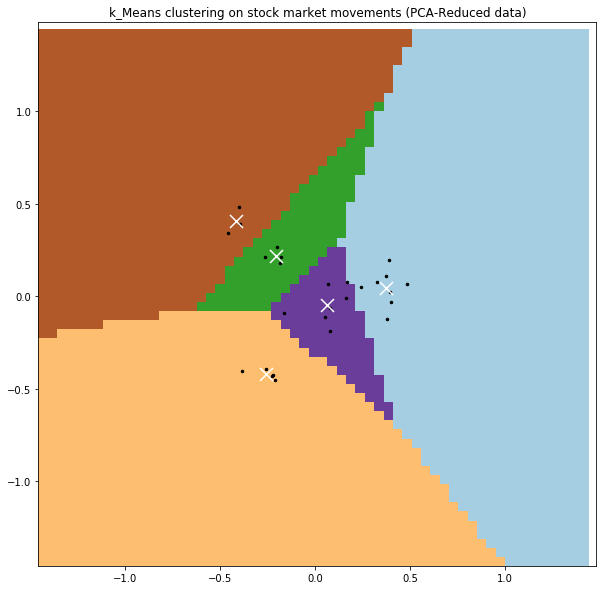

In [63]:
from sklearn.decomposition import PCA 
#Reduce the data 
pca_data= PCA(n_components =2).fit_transform(norm_movements)
#define step size of mesh 
h = 0.05
#plot the decision boundary 
x_min, x_max = pca_data[:,0].min()-1, pca_data[:,0].max()+1 
y_min, y_max = pca_data[:,0].min()-1, pca_data[:,0].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max,h),np.arange(y_min, y_max, h))

#obtain labels for each point in the mesh using our trained model 
kpredictions = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# put the result into a color plot
kpredictions = kpredictions.reshape(xx.shape)
#define color plot 
cmap= plt.cm.Paired 
#Plotting figure 
plt.clf()
plt.figure(figsize= (10,10))
plt.imshow(kpredictions,interpolation='nearest',extent= (xx.min(),xx.max(),yy.min(),yy.max()),cmap=cmap, aspect='auto', origin='lower')
plt.plot(pca_data[:,0],pca_data[:,1], 'k.',markersize =5)

#plot the centroid of each cluster as a white x 

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1], marker = 'x', s= 169, linewidths = 3, color = 'w', zorder = 10)
plt.title('k_Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

___Cluster different companies___